In [1]:
import numpy as np
import matplotlib.pyplot as plt
from finite_volume.advection import AdvectionSolver
from finite_volume.initial_conditions import generate_ic


def l1(x: np.ndarray) -> float:
    return np.mean(np.abs(x))


def l2(x: np.ndarray) -> float:
    return np.sqrt(np.mean(np.square(x)))


def linf(x: np.ndarray) -> float:
    return np.max(np.abs(x))

In [2]:
p = 7
a = 1
k = -2
ic_type__PAD = "square", (-np.inf, np.inf)
quadrature = "gauss-legendre"
SED = False
limiter_config = {"apriori_limiting": True, "mpp_lite": False}

In [3]:
ic_type, PAD = ic_type__PAD


n = (64, 64)

noise = 1e-14 * (np.random.rand(*n) - 0.5)


def u0(x, y):
    return generate_ic(type=ic_type, x=x, y=y)


def u0_shifted(x, y):
    return u0(x, y) - noise


u0_shifted.__name__ += f"_{a}_{k}"

shared_config = dict(
    **limiter_config,
    save=False,
    load=False,
    v=(1, 1),
    n=n,
    order=p + 1,
    courant=0.8,
    snapshot_dt=1,
    num_snapshots=1,
    flux_strategy=quadrature,
    SED=SED,
)

# baseline
solver = AdvectionSolver(
    **shared_config,
    u0=u0,
    PAD=PAD,
)
solver.rkorder()

# shifted initial condition
noisey_solver = AdvectionSolver(
    **shared_config,
    u0=u0_shifted,
    PAD=PAD,
)
noisey_solver.rkorder()

# check equivariance
diffs = solver.u_snapshots[-1][1] - noisey_solver.u_snapshots[-1][1]
print(f"{l1(diffs)=}")
print(f"{l2(diffs)=}")
print(f"{linf(diffs)=}")

Try a  CFL factor less than 0.05000

New solution instance...


100%|██████████| 1.0/1 [00:04]                 



Try a  CFL factor less than 0.05000

New solution instance...


100%|██████████| 1.0/1 [00:03]                 


l1(diffs)=4.1056979822173074e-16
l2(diffs)=9.861072560186345e-16
linf(diffs)=3.6193270602780103e-14


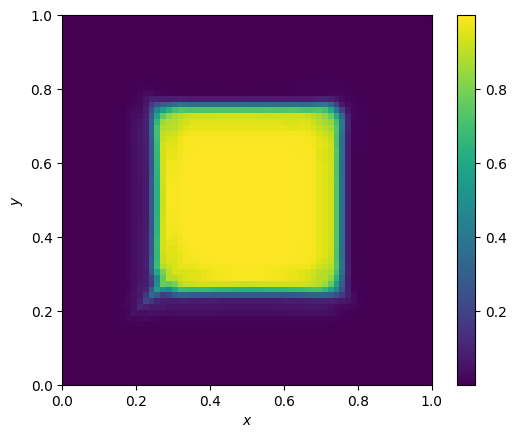

In [4]:
plt.imshow(np.flipud(noisey_solver.u_snapshots[-1][1]), extent=(0, 1, 0, 1))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.colorbar()

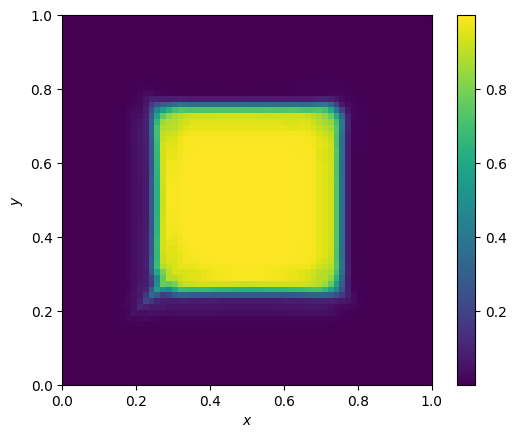

In [5]:
plt.imshow(np.flipud(solver.u_snapshots[-1][1]), extent=(0, 1, 0, 1))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.colorbar()

Text(0, 0.5, '$y$')

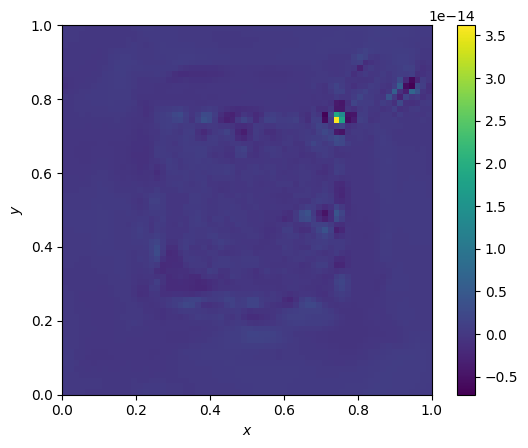

In [6]:
i = -1

plt.imshow(
    np.flipud(noisey_solver.u_snapshots[i][1] - solver.u_snapshots[i][1]),
    extent=(0, 1, 0, 1),
)
plt.colorbar()
plt.xlabel("$x$")
plt.ylabel("$y$")